# PROYECTO 2

## Análisis de datos en el mercado financiero

In [418]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [129]:
def closes(names,start_date,end_date):
    return web.DataReader(names,'yahoo',start_date,end_date)['Adj Close']

In [130]:
names=['DIS','CUERVO.MX','WALMEX.MX']
datos=closes(names,'2019-01-01','2019-12-31')
datos

Symbols,DIS,CUERVO.MX,WALMEX.MX
Date,,,
2019-01-02,107.654343,26.214523,48.800369
2019-01-03,105.046211,26.185068,47.848305
2019-01-04,108.286606,26.567976,48.741474
2019-01-07,109.225136,26.135977,48.918148
2019-01-08,110.074753,26.077066,49.585567
...,...,...,...
2019-12-24,145.289993,35.279999,55.360001
2019-12-26,145.699997,34.910000,55.320000
2019-12-27,145.750000,34.730000,55.639999


In [131]:
datos1=((datos-datos.shift())/datos.shift()).dropna()
datos1

Symbols,DIS,CUERVO.MX,WALMEX.MX
Date,,,
2019-01-03,-0.024227,-0.001124,-0.019509
2019-01-04,0.030847,0.014623,0.018667
2019-01-07,0.008667,-0.016260,0.003625
2019-01-08,0.007779,-0.002254,0.013644
2019-01-09,0.011219,-0.012425,-0.012668
...,...,...,...
2019-12-24,0.004216,0.012339,0.000181
2019-12-26,0.002822,-0.010487,-0.000723
2019-12-27,0.000343,-0.005156,0.005785


### Simulación de rendimientos diarios

### Gráfica de diferencias 2019

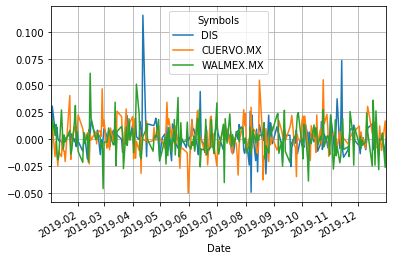

In [132]:
datos1.plot(grid=True)

#### Gráfica DISNEY

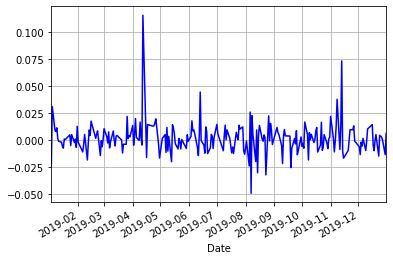

In [133]:
datos1['DIS'].plot(grid=True, color='blue')

#### Gráfica CUERVO.MX

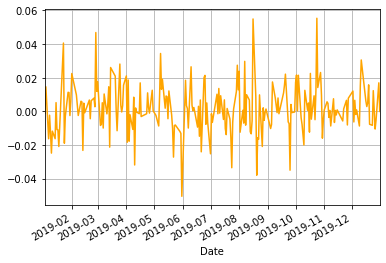

In [134]:
datos1['CUERVO.MX'].plot(grid=True, color='orange')

#### Gráfica WALMEX.MX

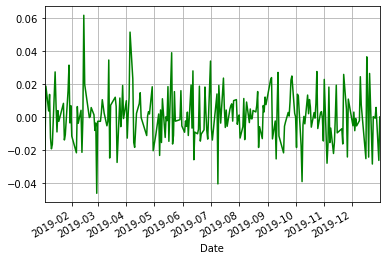

In [135]:
datos1['WALMEX.MX'].plot(grid=True, color='green')

#### Media

In [136]:
mu=datos1.mean()
mu

Symbols
DIS          0.001570
CUERVO.MX    0.001464
WALMEX.MX    0.000414
dtype: float64

#### Variación

In [137]:
sigma=datos1.std()
sigma

Symbols
DIS          0.014472
CUERVO.MX    0.014562
WALMEX.MX    0.015355
dtype: float64

In [138]:
dias=7
simulaciones=14
media=7
ds=2
ds*np.random.randn(dias,simulaciones)+media

array([[ 9.19402148,  8.13227509,  5.76228259,  7.53232211,  5.6400713 ,
         5.28206219,  6.67549695,  4.96087188,  6.57245665,  5.9811178 ,
         8.19770663, 11.78220261,  9.11745935,  8.78669676],
       [10.04125681,  7.18246557,  6.6802221 ,  3.74056277,  2.90186101,
         7.44876556,  5.81792757,  8.006654  ,  8.4044984 ,  7.63601625,
         8.06920874,  3.57529655,  6.64689865,  7.4550519 ],
       [ 7.35174069,  8.11830752,  9.47122014, 10.48819072,  7.13359677,
         5.88160659,  8.07988325,  9.28975339,  7.04733324,  6.29018965,
         9.2050553 ,  5.68908393,  9.64782423,  9.80206349],
       [ 8.47898786,  9.66908627,  4.82909519,  5.75601726,  6.39665698,
         6.68035669,  7.17029702,  6.96039719,  6.84923108,  6.12299223,
         7.10891488,  4.31307472,  5.37277488,  5.96570962],
       [ 7.30650849,  8.98260496,  9.97061323,  3.58019517,  8.31516835,
         6.31423729,  8.98205625,  8.1505489 ,  7.4237152 ,  3.7666794 ,
         6.25451304,  8.62

#### Simular varios escenarios de rendimientos diarios

In [139]:
def sim_r(mu,sigma,start_date,ndays,N):
    dates=pd.date_range(start_date,periods=ndays,freq='D')
    return pd.DataFrame(index=dates,data=mu+sigma*np.random.randn(ndays,N))

Simularemos 50 escenarios para todo el año (365 días)

#### DISNEY

In [140]:
simDIS=sim_r(mu['DIS'],sigma['DIS'],'2020-01-01',365,50)
simDIS

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2020-01-01,0.007125,0.011291,0.009367,0.018951,0.000260,-0.008661,0.003307,0.030396,0.002430,-0.029569,...,-0.017779,-0.006696,0.000467,-0.007031,0.009896,0.009493,-0.016376,0.014128,0.002313,-0.018718
2020-01-02,-0.020943,-0.017384,-0.016810,0.004808,-0.002116,0.028030,0.010364,-0.015395,0.014376,-0.017652,...,0.019426,0.012366,0.003680,-0.012441,-0.007685,-0.018256,0.007123,0.008638,-0.014661,-0.021188
2020-01-03,0.002909,0.017964,0.011492,0.012198,0.003501,-0.003848,0.004208,0.001925,-0.002602,-0.000515,...,-0.003754,-0.002006,-0.008880,0.016700,-0.008977,-0.001357,-0.006207,-0.007697,0.013809,0.009648
2020-01-04,0.026619,0.024730,0.012628,0.019565,0.007345,0.000321,0.009686,0.005713,0.004468,-0.023947,...,-0.000535,0.016154,-0.017309,-0.014926,-0.003523,-0.000647,0.003993,-0.020956,0.000940,0.013711
2020-01-05,0.008852,0.025227,0.012526,-0.017818,0.025645,-0.000714,0.010297,-0.002831,0.006377,-0.002191,...,0.004345,0.001758,-0.013269,0.014171,0.016626,0.011287,-0.024468,0.016145,-0.023957,-0.007629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.006937,0.009875,0.013791,0.041504,0.000497,0.019238,-0.008568,0.023375,-0.025371,-0.000635,...,0.005442,-0.002687,0.019199,-0.005437,-0.006053,0.020903,0.010913,0.001877,0.002323,0.007357
2020-12-27,0.003347,-0.014552,0.006673,-0.000849,0.027996,-0.008914,0.007778,0.025615,0.022430,-0.000551,...,0.000186,-0.003373,-0.007695,-0.017252,-0.013771,0.015817,0.001284,0.007243,-0.008051,0.022758
2020-12-28,0.005526,-0.004012,-0.006155,0.031038,0.006583,0.001177,-0.024923,0.007309,-0.010512,0.011303,...,-0.006079,-0.000896,-0.002254,-0.001657,-0.008078,0.017249,-0.018558,0.000357,0.017411,0.022106
2020-12-29,0.025359,0.033710,0.034722,0.009421,-0.016154,-0.001176,-0.012306,0.026494,-0.010168,0.012751,...,0.005737,-0.023274,0.018253,-0.015163,0.015999,-0.008821,0.000584,-0.008814,-0.012524,-0.020268


#### CUERVO.MX

In [141]:
simCUERVO=sim_r(mu['CUERVO.MX'],sigma['DIS'],'2020-01-01',365,50)
simCUERVO

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2020-01-01,0.024345,0.005978,0.030167,-0.012705,-0.013463,-0.060388,0.004044,-0.002208,-0.024105,-0.019941,...,-0.018841,-0.017132,0.003940,-0.001511,-0.003367,0.005070,-0.001030,0.014720,0.007225,-0.005496
2020-01-02,-0.000459,0.010590,-0.013885,-0.027070,0.005709,-0.003558,0.019365,-0.028702,0.032910,0.023284,...,-0.017163,0.019818,0.005781,0.000009,0.012403,-0.005796,0.016947,0.011463,-0.009538,0.006507
2020-01-03,-0.012714,-0.033628,0.001952,0.009109,0.005666,0.016869,0.019541,0.004403,0.010550,-0.000618,...,-0.004616,0.005448,-0.006821,-0.008661,0.009815,-0.011024,0.003997,-0.010292,0.013437,-0.019235
2020-01-04,0.006091,-0.009367,0.013762,-0.006009,0.002673,-0.000690,-0.018167,0.003915,-0.021019,0.000031,...,0.015000,0.008232,0.011312,0.015911,0.024086,0.017132,-0.007989,-0.006426,0.013140,0.009891
2020-01-05,-0.016393,-0.015293,-0.006017,-0.002984,-0.014341,-0.002255,-0.007855,0.004188,0.004514,0.007714,...,0.007252,-0.018115,-0.012654,0.013058,-0.023561,0.034357,0.007674,-0.000755,-0.017736,-0.012340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.014924,-0.007764,-0.040408,0.006651,0.004448,0.007627,0.024171,0.006420,0.012038,0.009436,...,0.020523,-0.020720,0.009486,-0.002133,0.004247,0.023242,0.013743,0.028299,-0.007870,-0.036902
2020-12-27,0.029638,0.017102,-0.014721,-0.005666,0.014507,0.018953,0.007955,0.020095,0.022433,-0.009277,...,0.005869,0.007433,0.005883,-0.004238,0.003796,0.006004,-0.006781,0.004549,-0.000922,-0.003073
2020-12-28,0.005711,-0.007430,-0.000225,-0.031436,0.003746,-0.004561,-0.002937,0.007605,0.003266,0.014647,...,0.018552,0.008143,-0.005907,0.009835,0.030465,-0.024503,-0.004386,0.026942,-0.034964,0.000098
2020-12-29,0.008787,-0.022940,0.014767,-0.012423,-0.011997,0.012396,0.027152,0.011624,0.002031,0.006093,...,0.010745,0.014495,0.003027,0.010650,-0.017736,-0.000194,0.002087,-0.023687,-0.005584,0.027456


#### WALMEX.MX

In [142]:
simWALMEX=sim_r(mu['WALMEX.MX'],sigma['DIS'],'2020-01-01',365,50)
simWALMEX

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2020-01-01,0.018813,-0.028272,-0.014568,-0.018161,0.009440,-0.009658,-0.011997,-0.012504,0.004983,-0.008537,...,0.012838,0.027756,0.005597,-0.009446,-0.012270,0.010668,-0.014505,0.002020,-0.005522,-0.027847
2020-01-02,-0.011529,-0.000064,-0.015855,0.013126,-0.006436,0.011555,-0.027615,-0.007355,-0.004925,-0.025016,...,-0.000124,0.014373,-0.011594,-0.014721,-0.007600,0.010580,0.025579,-0.005016,-0.013645,0.008219
2020-01-03,0.017494,0.000652,-0.013587,0.014651,0.019990,-0.008731,0.000065,-0.004242,0.003938,-0.000338,...,0.018363,-0.006055,0.002586,-0.009568,0.019316,-0.025499,0.019397,-0.001422,0.010417,-0.009995
2020-01-04,0.019080,0.009548,-0.022031,0.000069,0.005156,-0.013919,-0.024862,0.018583,-0.010452,-0.004449,...,0.006011,-0.003406,-0.024025,-0.000677,0.002927,0.003015,0.027570,-0.029590,-0.003152,-0.016378
2020-01-05,-0.000113,-0.003644,-0.021982,0.018463,-0.024126,-0.011552,0.018016,-0.036780,0.008388,-0.016844,...,0.017986,0.010034,0.001906,-0.017996,-0.012272,-0.000482,-0.005529,0.013331,0.013695,0.013359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,-0.005846,0.001982,-0.007349,0.014817,0.008068,0.014536,0.025638,-0.000436,0.002742,0.017931,...,0.016013,0.016939,0.005432,-0.000279,0.006973,0.013215,-0.030152,-0.007632,-0.023528,-0.000545
2020-12-27,-0.000919,0.022786,-0.021225,-0.013062,0.003472,0.005804,-0.010645,0.007224,0.034435,0.011405,...,0.004289,0.022449,0.024188,0.003298,0.000787,-0.008926,-0.029892,-0.012904,-0.015007,0.017283
2020-12-28,0.002574,-0.025781,-0.009943,0.006170,0.004464,0.010268,0.008281,-0.007351,-0.010365,-0.002706,...,0.005203,0.001984,0.012598,-0.000517,-0.020665,0.007349,0.031346,-0.002897,0.023395,0.016010
2020-12-29,0.004904,-0.003255,-0.000568,0.012400,-0.003775,0.005881,0.007183,0.024488,0.014622,0.013379,...,0.017227,-0.001477,0.019754,-0.007245,0.027406,-0.019619,0.004799,-0.000839,0.038795,-0.002133


### Precio de cierre

In [196]:
simCloses_DIS=datos['DIS'].iloc[-1]*(1+simDIS).cumprod()
simCloses_DIS

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2020-01-01,145.660480,146.263083,145.984698,147.370876,144.667567,143.377387,145.108263,149.026207,144.981462,140.353496,...,142.058646,143.661595,144.697529,143.613079,146.061235,146.002933,142.261563,146.673384,144.964496,141.922783
2020-01-02,142.609875,143.720439,143.530687,148.079479,144.361429,147.396252,146.612193,146.731938,147.065762,137.876014,...,144.818224,145.438149,145.230012,141.826378,144.938818,143.337495,143.274912,147.940402,142.839222,138.915668
2020-01-03,143.024751,146.302278,145.180192,149.885782,144.866808,146.829011,147.229171,147.014356,146.683122,137.805071,...,144.274518,145.146360,143.940413,144.194849,143.637731,143.143027,142.385662,146.801637,144.811714,140.255916
2020-01-04,146.831902,149.920262,147.013543,152.818268,145.930920,146.876180,148.655286,147.854272,147.338436,134.505084,...,144.197274,147.491031,141.449006,142.042535,143.131745,143.050483,142.954200,143.725298,144.947774,142.178962
2020-01-05,148.131587,153.702318,148.855100,150.095283,149.673373,146.771295,150.186029,147.435675,148.278041,134.210361,...,144.823802,147.750259,139.572053,144.055354,145.511440,144.665096,139.456349,146.045727,141.475329,141.094280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,175.119974,352.721114,179.056216,233.824993,196.366045,301.284553,230.119774,232.729391,269.238410,180.677543,...,214.518011,269.260015,300.360370,223.025979,269.953144,221.559457,260.850901,325.487249,177.513294,504.235251
2020-12-27,175.706126,347.588312,180.251046,233.626545,201.863464,298.598841,231.909678,238.690798,275.277422,180.578068,...,214.557809,268.351726,298.048973,219.178412,266.235578,225.063805,261.185895,327.844793,176.084082,515.710854
2020-12-28,176.677011,346.193684,179.141587,240.877813,203.192417,298.950184,226.129833,240.435422,272.383599,182.619155,...,213.253432,268.111202,297.377052,218.815246,264.085028,228.945951,256.338682,327.961801,179.149856,527.110921
2020-12-29,181.157448,357.863969,185.361712,243.147237,199.910102,298.598644,223.347144,246.805430,269.614010,184.947680,...,214.476955,261.871224,302.805049,215.497444,268.310079,226.926525,256.488431,325.071006,176.906214,516.427332


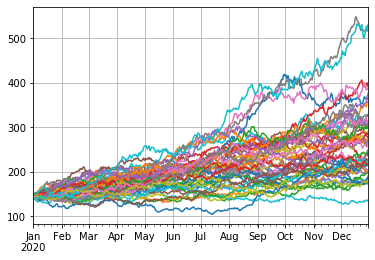

In [199]:
simCloses_DIS.plot(grid=True,legend=False)

In [200]:
simCloses_CUERVO=datos['CUERVO.MX'].iloc[-1]*(1+simDIS).cumprod()
simCloses_CUERVO

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2020-01-01,35.571651,35.718813,35.650828,35.989346,35.329173,35.014099,35.436795,36.393593,35.405829,34.275636,...,34.692050,35.083505,35.336490,35.071657,35.669520,35.655282,34.741604,35.819012,35.401685,34.658871
2020-01-02,34.826665,35.097875,35.051536,36.162394,35.254411,35.995543,35.804068,35.833312,35.914834,33.670612,...,35.365965,35.517356,35.466527,34.635328,35.395415,35.004357,34.989073,36.128430,34.882674,33.924505
2020-01-03,34.927982,35.728384,35.454361,36.603510,35.377829,35.857017,35.954740,35.902281,35.821390,33.653287,...,35.233187,35.446099,35.151595,35.213730,35.077677,34.956866,34.771910,35.850333,35.364375,34.251806
2020-01-04,35.857724,36.611930,35.902082,37.319650,35.637695,35.868537,36.303011,36.107396,35.981424,32.847399,...,35.214323,36.018689,34.543170,34.688115,34.954111,34.934266,34.910752,35.099062,35.397602,34.721432
2020-01-05,36.175119,37.535543,36.351807,36.654672,36.551637,35.842923,36.676833,36.005171,36.210884,32.775425,...,35.367327,36.081995,34.084800,35.179665,35.535254,35.328569,34.056545,35.665732,34.549598,34.456543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,42.765935,86.137795,43.727202,57.102250,47.954425,73.576505,56.197401,56.834694,65.750537,44.123146,...,52.387304,65.755814,73.350811,54.465030,65.925082,54.106891,63.702229,79.487030,43.350406,123.138964
2020-12-27,42.909079,84.884316,44.018991,57.053787,49.296946,72.920629,56.634512,58.290525,67.225321,44.098853,...,52.397023,65.534001,72.786346,53.525418,65.017218,54.962686,63.784038,80.062764,43.001379,125.941413
2020-12-28,43.146178,84.543735,43.748051,58.824615,49.621488,73.006430,55.223020,58.716578,66.518622,44.597305,...,52.078482,65.475263,72.622257,53.436729,64.492033,55.910742,62.600303,80.091339,43.750070,128.725416
2020-12-29,44.240343,87.393728,45.267063,59.378829,48.819916,72.920581,54.543461,60.272194,65.842262,45.165953,...,52.377278,63.951402,73.947825,52.626491,65.523830,55.417580,62.636873,79.385380,43.202152,126.116384


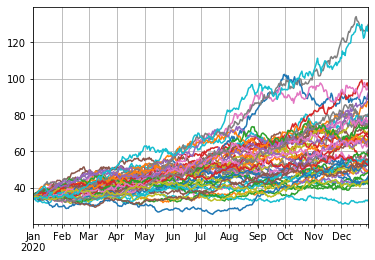

In [201]:
simCloses_CUERVO.plot(grid=True,legend=False)

In [202]:
simCloses_WALMEX=datos['WALMEX.MX'].iloc[-1]*(1+simDIS).cumprod()
simCloses_WALMEX

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2020-01-01,54.566028,54.791769,54.687483,55.206761,54.194072,53.710756,54.359161,55.826866,54.311660,52.577973,...,53.216741,53.817223,54.205296,53.799049,54.716155,54.694314,53.292756,54.945473,54.305304,53.165845
2020-01-02,53.423237,53.839267,53.768184,55.472212,54.079389,55.216267,54.922550,54.967408,55.092462,51.649880,...,54.250509,54.482740,54.404770,53.129731,54.295685,53.695812,53.672368,55.420112,53.509153,52.039346
2020-01-03,53.578655,54.806452,54.386106,56.148873,54.268709,55.003772,55.153677,55.073205,54.949121,51.623304,...,54.046831,54.373433,53.921672,54.016986,53.808284,53.622962,53.339245,54.993518,54.248071,52.541418
2020-01-04,55.004855,56.161789,55.072900,57.247414,54.667338,55.021443,55.687915,55.387847,55.194608,50.387093,...,54.017895,55.251772,52.988363,53.210705,53.618736,53.588294,53.552225,53.841087,54.299040,53.261813
2020-01-05,55.491732,57.578589,55.762768,56.227354,56.069302,54.982151,56.261348,55.231035,55.546595,50.276686,...,54.252599,55.348882,52.285235,53.964730,54.510195,54.193146,52.241892,54.710346,52.998224,52.855479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,65.601880,132.133233,67.076440,87.593430,73.560894,112.864527,86.205414,87.183005,100.859688,67.683807,...,80.360821,100.867781,112.518318,83.548000,101.127435,82.998625,97.717634,121.931125,66.498444,188.892105
2020-12-27,65.821459,130.210428,67.524037,87.519089,75.620287,111.858430,86.875932,89.416214,103.121968,67.646542,...,80.375730,100.527526,111.652444,82.106659,99.734794,84.311392,97.843127,122.814287,65.963046,193.190993
2020-12-28,66.185164,129.687985,67.108421,90.235494,76.118128,111.990047,84.710738,90.069770,102.037910,68.411156,...,79.887095,100.437423,111.400735,81.970612,98.929174,85.765687,96.027307,122.858120,67.111519,197.461584
2020-12-29,67.863585,134.059803,69.438549,91.085645,74.888537,111.858356,83.668312,92.456045,101.000392,69.283447,...,80.345441,98.099858,113.434122,80.727727,100.511925,85.009188,96.083404,121.775196,66.271025,193.459394


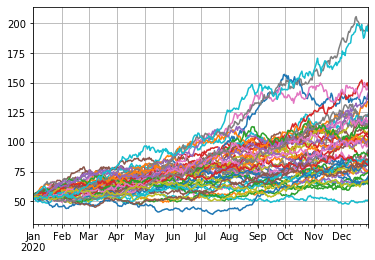

In [333]:
simCloses_WALMEX.plot(grid=True,legend=False)

In [207]:
def simCloses(data,mu,sigma,start_date,ndays,N):
    simR=sim_r(mu,sigma,start_date,ndays,N)
    return data*(1+simR).cumprod()

In [211]:
simCloses(datos['DIS'].iloc[-1],mu['DIS'],sigma['DIS'],'2019-01-01',365,100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,143.527717,145.123849,144.298883,145.433887,148.846005,144.161375,141.874611,141.439149,145.049376,146.549524,...,147.310270,146.512041,144.128597,147.610211,144.538671,144.835802,143.154004,148.425139,144.314748,144.657920
2019-01-02,148.511890,146.126389,145.039351,150.228266,150.646428,143.414414,140.035849,143.510162,148.992419,148.403207,...,145.921569,149.691061,145.045926,146.837975,146.774241,143.878865,142.940345,148.608917,145.633026,146.361215
2019-01-03,148.581650,148.765806,142.566145,147.812464,150.874977,143.842493,137.767339,148.606454,149.352255,150.461513,...,142.029217,150.316158,144.527873,145.052922,143.415139,143.621423,142.859830,149.024584,146.795578,145.428639
2019-01-04,146.850676,147.553069,139.115167,149.654034,153.398925,146.449969,138.323615,147.737718,153.031246,149.113407,...,141.514014,149.541846,143.165264,144.159674,145.417474,145.258502,141.000185,149.614689,147.171851,147.670263
2019-01-05,144.643072,146.899025,136.715796,150.884579,149.766992,144.370944,138.723324,146.382371,153.818616,151.966453,...,142.482945,151.066994,147.636781,146.258620,147.211367,146.251847,144.292007,148.326873,147.150479,144.925139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,233.677018,210.399454,227.456282,208.414077,263.881194,243.900431,167.782025,194.733264,419.522319,272.225277,...,260.545265,423.797798,219.649867,251.237907,358.244585,170.718795,169.682909,303.030410,243.821777,232.003583
2019-12-28,229.907150,211.221538,223.932212,206.771158,266.163887,247.275540,168.718209,190.747793,433.490710,273.283914,...,258.252746,420.391965,215.932251,249.994337,356.774304,173.018869,168.718163,308.099682,245.834385,235.644928
2019-12-29,229.506276,210.959151,225.618992,211.219116,272.053723,255.249685,168.636828,193.023571,430.895233,280.591793,...,259.652574,423.147839,214.676891,252.177079,357.747228,172.907230,167.847271,308.711050,251.408049,234.993590
2019-12-30,230.281373,206.498129,223.884600,209.091736,271.123698,264.522028,170.400520,197.879597,439.658930,278.392266,...,259.636927,431.690469,214.783271,254.421380,353.822763,174.593621,168.809454,306.366205,257.899658,240.518441


## Probabilidad precio-umbral

·El umbral será de 150% del último precio. 

·Nuestras fechas serán apartir del 1° de enero de 2020

#### DISNEY

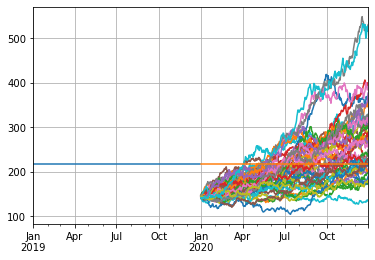

In [263]:
Umbral=datos['DIS'].iloc[-1]*1.5
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
# DataFrame de Umbrales
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)

simCloses_DIS_U=pd.concat([simCloses_DIS,DF_Umbral],axis=1)
simCloses_DIS_U.plot(grid=True,legend=False)

#### CUERVO.MX

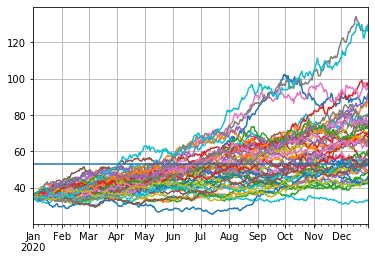

In [264]:
Umbral=datos['CUERVO.MX'].iloc[-1]*1.5
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
# DataFrame de Umbrales
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)

simCloses_CUERVO_U=pd.concat([simCloses_CUERVO,DF_Umbral],axis=1)
simCloses_CUERVO_U.plot(grid=True,legend=False)

#### WALMEX.MX

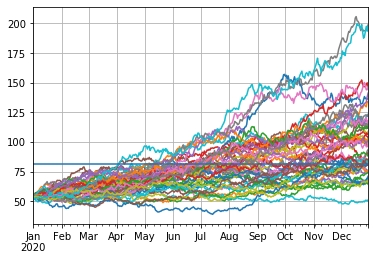

In [265]:
Umbral=datos['WALMEX.MX'].iloc[-1]*1.5
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
# DataFrame de Umbrales
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)

# Concatenar y graficar
simCloses_WALMEX_U=pd.concat([simCloses_WALMEX,DF_Umbral],axis=1)
simCloses_WALMEX_U.plot(grid=True,legend=False)

## Prediciendo precios de las acciones

#### Ahora solo elegiremos a una empresa. DISNEY

In [270]:
def closes_dis(names,start_date,end_date):
    return web.DataReader(names,'yahoo',start_date,end_date)['Adj Close']

In [280]:
name_dis=['DIS']
datos_dis=closes_dis(name_dis,'2019-01-01','2019-12-31')
datos_dis

Symbols,DIS
Date,
2019-01-02,107.654343
2019-01-03,105.046211
2019-01-04,108.286606
2019-01-07,109.225136
2019-01-08,110.074753
...,...
2019-12-24,145.289993
2019-12-26,145.699997
2019-12-27,145.750000


In [409]:
log_rend = np.log(1 + datos_dis.pct_change())
u = log_rend.mean()
var = log_rend.var()
drift = u - (0.5 * var)
stdev = log_rend.std()

t_int = 1000
it = 10

ret_diarios = np.exp(u.values+10*stdev.values*norm.ppf(np.random.rand(t_int, it)))

Creamos S0 igual al precio de cierre

In [410]:
S0 = datos_dis.iloc[-1]
S0

Symbols
DIS    144.630005
Name: 2019-12-31 00:00:00, dtype: float64

Creamos precio_lista con las mismas dimensiones que rendimiento o retorno diario.

In [411]:
precio_lista = np.zeros_like(ret_diarios)
precio_lista

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [412]:
precio_lista[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Valores de la primera columna del array iguales a S0.

In [413]:
precio_lista[0] = S0
precio_lista

array([[144.63000488, 144.63000488, 144.63000488, ..., 144.63000488,
        144.63000488, 144.63000488],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Creamos un loop en el rango (1, t_int) que reasigna el precio en tiempo t al producto del precio del día (t-1) con los valores del rendimiento diario en t.

In [415]:
for t in range(1, t_int):
    precio_lista[t] = precio_lista[t - 1] * ret_diarios[t]

In [416]:
precio_lista

array([[1.44630005e+02, 1.44630005e+02, 1.44630005e+02, ...,
        1.44630005e+02, 1.44630005e+02, 1.44630005e+02],
       [1.65519711e+02, 1.41808543e+02, 1.11491396e+02, ...,
        1.21290588e+02, 1.72540352e+02, 1.63224749e+02],
       [1.83725135e+02, 1.15071874e+02, 1.24381963e+02, ...,
        8.22044997e+01, 2.36029581e+02, 1.61835200e+02],
       ...,
       [1.06693027e+04, 1.08769527e+02, 7.55201439e+01, ...,
        1.37955081e+00, 6.24064799e+00, 2.81474274e+02],
       [8.47610994e+03, 1.31582906e+02, 6.40456964e+01, ...,
        1.45220229e+00, 5.92782050e+00, 2.58112731e+02],
       [7.14149282e+03, 1.44279023e+02, 4.67042469e+01, ...,
        1.44034996e+00, 6.44234998e+00, 2.45839848e+02]])

Gráfica

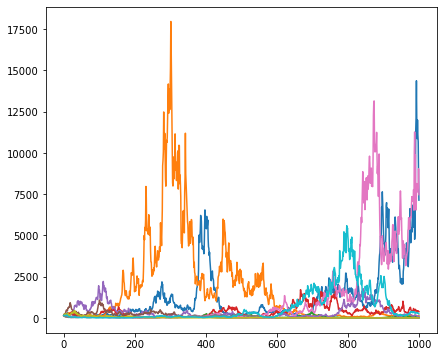

In [417]:
plt.figure(figsize=(7,6))
plt.plot(precio_lista)